# Test DMI Calculation

In [44]:
import sys
sys.path.append('../')
import helpers.fileHandler as fh
import helpers.cvdpTime as cvdpTime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ModuleNotFoundError: No module named 'cmocean'

First load up the cvdp and figure out the details of the index we want to calculate

In [2]:
cvdp = fh.loadModelData('CESM-LME', 'cvdp_data', '001', decode_times=False)
iodCvdp = cvdp.indian_ocean_dipole
del cvdp
iodCvdp = cvdpTime.decodeTime(iodCvdp)
iodCvdp.comment_cvdp

Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/cesm1.lm.cvdp_data/b.e11.BLMTRC5CN.f19_g16.001.cvdp_data.850-2005.nc']


'area average domain (-10:10N, 50:70E) - (-10:0N, 90:110E)'

In [28]:
ds = fh.loadModelData('CESM-LME', 'SST', '001')

Files imported: 
 ['/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.085001-089912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.090001-099912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.100001-109912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.110001-119912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.120001-129912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.130001-139912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.140001-149912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.150001-159912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-LME/mon/SST/b.e11.BLMTRC5CN.f19_g16.001.pop.h.SST.160001-169912.nc', '/Volumes/Untitled/CMIP5-PMIP3/CESM-

In [86]:
easternIO=ds.where((ds.TLAT>=-10) & (ds.TLAT<=0) & (ds.TLONG>=90) & (ds.TLONG<=110))
westernIO=ds.where((ds.TLAT>=-10) & (ds.TLAT<=10) & (ds.TLONG>=50) & (ds.TLONG<=70))
#del(ds)

easternIO=easternIO.drop(('ANGLE','ANGLET', 'DXT', 'DXU', 'DYT', 'DYU', 'HT', 'HTE', 'HTN',
              'HU', 'HUS', 'HUW', 'KMT', 'KMU', 'REGION_MASK', 'T0_Kelvin',
              'UAREA', 'cp_air', 'cp_sw', 'days_in_norm_year', 'dz', 'dzw', 'fwflux_factor', 
              'grav', 'heat_to_PW', 'hflux_factor', 'latent_heat_fusion', 'latent_heat_vapor',
              'mass_to_Sv', 'moc_components', 'momentum_factor','nsurface_t', 'nsurface_u', 
              'ocn_ref_salinity', 'omega', 'ppt_to_salt', 'radius', 'rho_air', 'rho_fw', 'rho_sw',
              'salinity_factor', 'salt_to_Svppt', 'salt_to_mmday', 'salt_to_ppt', 'sea_ice_salinity',
              'sflux_factor', 'sound', 'stefan_boltzmann', 'transport_components', 'transport_regions',
              'vonkar','z_t_150m', 'z_w', 'z_w_bot', 'z_w_top', 'moc_z', 'lat_aux_grid', 'time_bound','z_t'))

Sanity check that the areas selected look believable

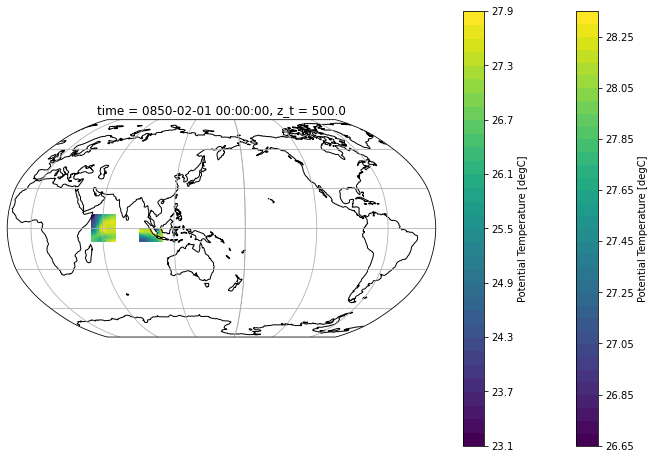

In [88]:
eIOSlice = easternIO.isel(time=0, z_t=0) # select a slice
wIOSlice = westernIO.isel(time=0, z_t=0)

# -- plot the 'quick' way
plt.figure(figsize=(12,8))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=160))  # set up projection
ax.set_global()

#sst2d.SST.plot.pcolormesh()

eIOSlice.SST.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='TLONG', y='TLAT', center=False, levels=35)

wIOSlice.SST.plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='TLONG', y='TLAT', center=False, levels=35)

ax.coastlines()
ax.gridlines()
plt.show()

In [89]:
easternIO

<xarray.Dataset>
Dimensions:               (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nlat: 384, nlon: 320, time: 13872, transport_comp: 5, transport_reg: 2, z_t: 1, z_t_150m: 15, z_w: 60, z_w_bot: 60, z_w_top: 60)
Coordinates:
    TLAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT                  (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG                 (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * lat_aux_grid          (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                 (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * time                  (time) object 0850-02-01 00:00:00 ... 2006-01-01 00...
  * z_t                   (z_t) float32 500.0
  * z_t_150m              (z_t_150m) float32 500.0 1.5e+03 ... 1.35e+04 1.45e+04
  * z_w                   (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot               (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * z_w_top               (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
Dimensions without coordinates: d2, moc_comp, nlat, nlon, transport_comp, transport_reg
Data variables: (12/54)
    ANGLE                 (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ANGLET                (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DXU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYT                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    DYU                   (time, nlat, nlon) float64 dask.array<chunksize=(600, 384, 320), meta=np.ndarray>
    ...                    ...
    stefan_boltzmann      (time, nlat, nlon) float64 dask.array<chunksize=(13872, 384, 320), meta=np.ndarray>
    time_bound            (time, d2, nlat, nlon) object dask.array<chunksize=(600, 2, 384, 320), meta=np.ndarray>
    transport_components  (time, transport_comp, nlat, nlon) object dask.array<chunksize=(600, 5, 384, 320), meta=np.ndarray>
    transport_regions     (time, transport_reg, nlat, nlon) object dask.array<chunksize=(600, 2, 384, 320), meta=np.ndarray>
    vonkar                (time, nlat, nlon) float64 dask.array<chunksize=(13872, 384, 320), meta=np.ndarray>
    SST                   (time, z_t, nlat, nlon) float32 dask.array<chunksize=(600, 1, 384, 320), meta=np.ndarray>
Attributes: (12/13)
    title:           b.e11.BLMTRC5CN.f19_g16.001
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 41939 2012-11-14 16:37:23Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    ...              ...
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0
    NCO:             4.3.7
    history:         Mon Mar 24 10:45:45 2014: ncrename -v TEMP,SST b.e11.BLM...

In [98]:
(easternIO.SST*easternIO.TAREA)/(easternIO.TAREA.sum(dim='time')

SyntaxError: unexpected EOF while parsing (<ipython-input-98-126f287bad2a>, line 1)